In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [2]:
df=pd.read_csv('carprice.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df2=df[['enginesize','horsepower','carlength','price']]

In [6]:
df2

,enginesize,horsepower,carlength,price
0,130,111,168.8,13495.0
1,130,111,168.8,16500.0
2,152,154,171.2,16500.0
3,109,102,176.6,13950.0
4,136,115,176.6,17450.0
...,...,...,...,...
200,141,114,188.8,16845.0
201,141,160,188.8,19045.0
202,173,134,188.8,21485.0
203,145,106,188.8,22470.0


In [7]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [8]:
df3 = df2.drop('price' , axis='columns')

In [9]:
df3

,enginesize,horsepower,carlength
0,130,111,168.8
1,130,111,168.8
2,152,154,171.2
3,109,102,176.6
4,136,115,176.6
...,...,...,...
200,141,114,188.8
201,141,160,188.8
202,173,134,188.8
203,145,106,188.8


In [10]:
df4 = df[['enginesize','horsepower','carlength','price']]

In [11]:
df4

,enginesize,horsepower,carlength,price
0,130,111,168.8,13495.0
1,130,111,168.8,16500.0
2,152,154,171.2,16500.0
3,109,102,176.6,13950.0
4,136,115,176.6,17450.0
...,...,...,...,...
200,141,114,188.8,16845.0
201,141,160,188.8,19045.0
202,173,134,188.8,21485.0
203,145,106,188.8,22470.0


In [12]:
main = df4['price']

In [13]:
main

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [18]:
reg = linear_model.LinearRegression()
reg.fit(df3,main)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
reg.predict([[145,121,177]])

C:\Users\SG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16411.60754961])

In [20]:
reg.predict([[100,150,200]])

C:\Users\SG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15958.75726898])

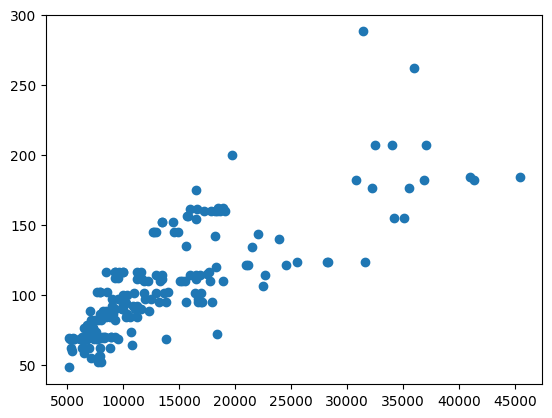

In [21]:
plt.scatter(df['price'],df['horsepower'])

In [22]:
reg.coef_

array([101.295282  ,  58.91734642, 104.21018971])

In [23]:
reg.intercept_

np.float64(-23850.41083730781)